In [58]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [113]:
data = []
browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

for i in range(2002,2023):
    browser.get("https://thongkemienbac.com/thong-ke-giai-dac-biet-nam-{}.html".format(i))
    for j in range(2,33):
        for k in range(2,14):
            value = browser.find_element(By.XPATH,"/html/body/section/div/div[2]/div/div[3]/div[2]/div/div[2]/table/tbody/tr[{}]/td[{}]".format(j,k))
            if len(value.text) == 0:
                data.append(None)
            else:
                span = browser.find_element(By.XPATH,"/html/body/section/div/div[2]/div/div[3]/div[2]/div/div[2]/table/tbody/tr[{}]/td[{}]/span".format(j,k))
                data.append(span.text)
browser.close()



====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Driver [C:\Users\tu.tong_onemount\.wdm\drivers\chromedriver\win32\101.0.4951.41\chromedriver.exe] found in cache


In [57]:
# pivot view

arr = np.array(data).reshape((651,12))
year_date = ['{}-{}'.format(i,j) for i in range(2002,2023) for j in range(1,32)]
calendar = pd.DataFrame(year_date)
calendar.columns = ['year-date']

final = pd.DataFrame({'1': arr[:, 0],'2': arr[:, 1]
                     ,'3': arr[:, 2],'4': arr[:, 3]
                     ,'5': arr[:, 4],'6': arr[:, 5]
                     ,'7': arr[:, 6],'8': arr[:, 7]
                     ,'9': arr[:, 8],'10': arr[:, 9]
                     ,'11': arr[:, 10],'12': arr[:, 11]} 
                    )
result = pd.concat([calendar,final],axis = 1)
result.head()

,year-date,1,2,3,4,5,6,7,8,9,10,11,12
0,2002-1,None,09,44,33,13,46,02,16,07,82,57,88
1,2002-2,None,00,26,02,58,49,50,01,09,91,60,33
2,2002-3,None,56,55,37,76,75,10,31,04,77,84,44
3,2002-4,None,14,28,73,35,43,10,88,91,74,02,84
4,2002-5,70,24,10,79,16,44,38,55,98,58,00,31


In [114]:
# normal view
final2 = pd.DataFrame(data)
ymd = ['{}-{}-{}'.format(i,j,k) for i in range(2002,2023) for j in range(1,13) for k in range(1,32)]
calendar_full = pd.DataFrame(ymd) 
result2 = pd.concat([calendar_full,final2],axis=1)
result2.columns = ['YMD','num']
result2 = result2.dropna(subset=['num'])
result2['num'] = result2['num'].astype(int)
result2.head()

,YMD,num
1,2002-1-2,9
2,2002-1-3,44
3,2002-1-4,33
4,2002-1-5,13
5,2002-1-6,46


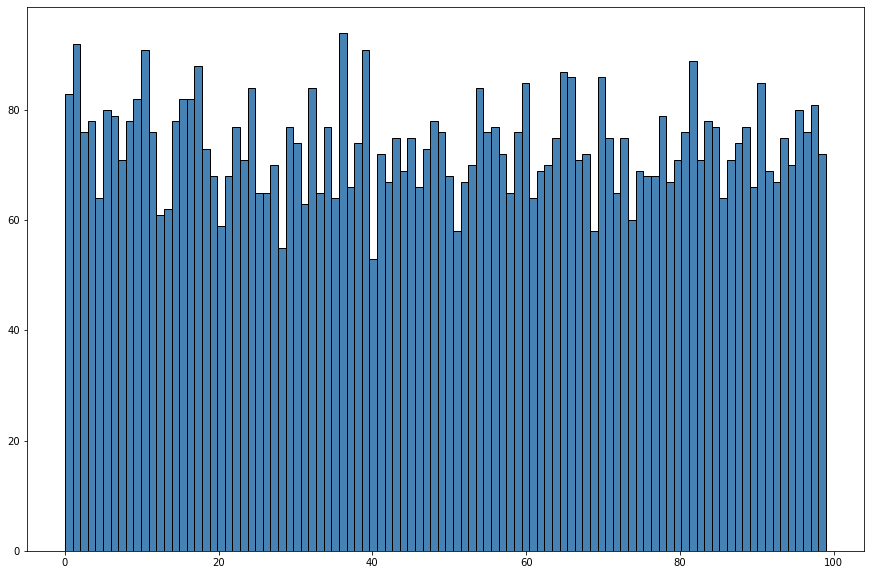

In [116]:
# check data uniform
a = result2['num']
plt.figure(figsize=(15, 10))
plt.hist(a,bins = 100, alpha = 1,histtype='bar', ec='black',color='steelblue')
plt.show()